<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных
'airports_nearest' — расстояние до ближайшего аэропорта в метрах (м)

'balcony' — число балконов

'ceiling_height' — высота потолков (м)

'cityCenters_nearest' — расстояние до центра города (м)

'days_exposition' — сколько дней было размещено объявление (от публикации до снятия)

'first_day_exposition' — дата публикации

'floor' — этаж

'floors_total' — всего этажей в доме

'is_apartment' — апартаменты (булев тип)

'kitchen_area' — площадь кухни в квадратных метрах (м²)

'last_price' — цена на момент снятия с публикации

'living_area' — жилая площадь в квадратных метрах (м²)

'locality_name' — название населённого пункта

'open_plan' — свободная планировка (булев тип)

'parks_around3000' — число парков в радиусе 3 км

'parks_nearest' — расстояние до ближайшего парка (м)

'ponds_around3000' — число водоёмов в радиусе 3 км

'ponds_nearest' — расстояние до ближайшего водоёма (м)

'rooms' — число комнат

'studio' — квартира-студия (булев тип)

'total_area' — площадь квартиры в квадратных метрах (м²)

'total_images' — число фотографий квартиры в объявлении

## Импорт библиотек

In [97]:
import pandas as pd

## Изучение данных из файла

In [98]:
data = pd.read_csv('../../data/real_estate_data.csv', sep='\t', decimal=',')
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

### Вывод

В данных наблюдаются пропуски, которые требуют замены.

Некоторые столбцы, которые содержат информацию в числах имеют тип object. Для вычислений их нужно будет привести к числовому значению.

Столбец с датой также требует изменения типа данных на дату

## Предобработка данных

In [100]:
# обработаем пропуски в балконах, заменим их на 0
data['balcony'] = data['balcony'].fillna(0) 

# приведем тип данных в столбце 'first_day_exposition' к дате 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# изменим тип данных в столбцах 'last_price', 'total_area', 'living_area', 'kitchen_area', 'last_price',
#'ceiling_height', 'cityCenters_nearest', 'days_exposition' в числовой
columns_numeric = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'last_price',
                   'ceiling_height', 'cityCenters_nearest', 'days_exposition']
for i in columns_numeric:
    data[i] = pd.to_numeric(data[i])

# переведем цену в тыс.руб. для удобства восприятия
data['last_price'] = data['last_price']/1000 

In [101]:
# определим уникальные значения общей этажности здания и увидим пропуски 'nan'
print(data['floors_total'].unique())

['16.0' '11.0' '5.0' '14.0' '12.0' '26.0' '24.0' '27.0' '9.0' '6.0' '17.0'
 '25.0' '3.0' '23.0' '19.0' '18.0' '4.0' '22.0' '8.0' '2.0' '10.0' '7.0'
 '13.0' '15.0' nan '20.0' '28.0' '36.0' '21.0' '35.0' '34.0' '60.0' '1.0'
 '29.0' '33.0' '52.0' '37.0']


In [102]:
print(data['floor'].unique()) # уникальные значения в столбце 'floor'

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]


В столбце общей этажности здания есть 86 пропущенных значений, при этом в столбце 'floor' пропусков нет.

В строке с пропущенными значениями в 'floors_total' значения 'floor' различные и они отличны от 0.

Присвоим таким пропускам значение 0

In [103]:
data['floors_total'] = pd.to_numeric(data['floors_total']) # этажность к float
data['floors_total'] = data['floors_total'].fillna(0)
print(data[data['floors_total']==0]['floor'].unique())
# в дальнейшем при добавлении столбца с типом этажа для значений 'floors_total'==0 будет присвоено значение 'другой'

[ 4  1 12  8  9 22 15  6  7  3 18 13 24 21 11  2  5 19 20 14 17 23 10]


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

В столбце общей площади пропусков нет.

В столбце жилой площади пропуски наблюдаются.

**Вывод:**

Данные готовы для дальнейшей работы.

## Расчёты и добавление результатов в таблицу

Создадим несколько дополнительных столбцов в общей таблице данных 'data':

In [105]:
data['price_sq_m'] = data['last_price'] / data['total_area'] # цена за кв.м
data['day_of_week'] = data['first_day_exposition'].dt.day_name() # наименование дня недели
data['weekday'] = data['first_day_exposition'].dt.weekday # номер дня недели
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month # месяц
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year # год публикации
data['living_area_ratio'] = data['living_area'] / data['total_area'] # отношение жилой площади к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area'] # отношение площади кухни к общей площади квартиры

In [106]:
# функция для определения типа этажа (первый, последний, другой)
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis=1) # добавление столбца с типом этажа в общую таблицу данных

In [107]:
# выведем обновленную таблицу данных
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_m,day_of_week,weekday,month,year,living_area_ratio,kitchen_area_ratio,floor_type
0,20,13000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,755.0,NaN,120.370370,Thursday,3,3,2019,0.472222,0.231481,другой
1,7,3350.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,NaN,81.0,82.920792,Tuesday,1,12,2018,0.460396,0.272277,первый
2,10,5196.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,574.0,558.0,92.785714,Thursday,3,8,2015,0.612500,0.148214,другой
3,0,64900.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,234.0,424.0,408.176101,Friday,4,7,2015,NaN,NaN,другой
4,2,10000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,48.0,121.0,100.000000,Tuesday,1,6,2018,0.320000,0.410000,другой
5,10,2890.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,55.0,95.065789,Monday,0,9,2018,0.473684,0.299342,другой
6,6,3700.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,NaN,155.0,99.195710,Thursday,3,11,2017,0.284182,0.386059,другой
7,5,7915.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,NaN,NaN,110.544693,Thursday,3,4,2019,NaN,0.263966,другой
8,20,2900.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,189.0,87.454765,Wednesday,2,5,2018,0.465320,0.265682,другой
9,18,5400.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,NaN,289.0,88.524590,Sunday,6,2,2017,0.714754,0.106557,другой


## Исследовательский анализ данных

Рассмотрим поведение данных, для этого выведем на экран несколько графиков

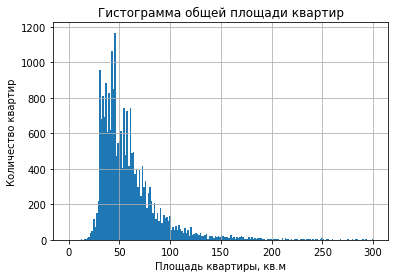

In [108]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=200, range=(0, 300)) # гистограмма общей площади квартиры
plt.title("Гистограмма общей площади квартир")
plt.ylabel("Количество квартир")
plt.xlabel("Площадь квартиры, кв.м")
plt.show() 

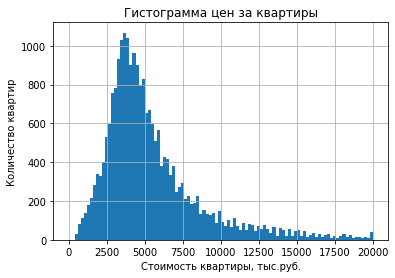

In [109]:
data['last_price'].hist(bins=100, range=(0, 20000)) # гистограмма цен за квартиры
plt.title("Гистограмма цен за квартиры")
plt.ylabel("Количество квартир")
plt.xlabel("Стоимость квартиры, тыс.руб.")
plt.show() 

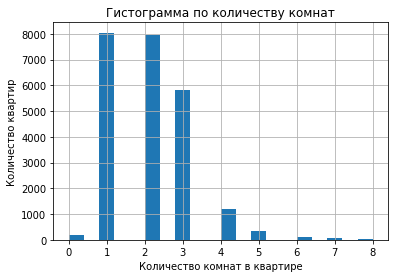

In [110]:
data['rooms'].hist(bins=20, range=(0, 8)) # гистограмма по количеству комнат
# по всему городу преобладают однокомнатные и двукомнатные квартиры

plt.title("Гистограмма по количеству комнат")
plt.ylabel("Количество квартир")
plt.xlabel("Количество комнат в квартире")
plt.show()

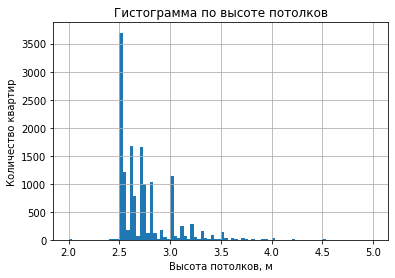

In [111]:
data['ceiling_height'].hist(bins=90, range=(2, 5)) # гистограмма по высоте потолков

plt.title("Гистограмма по высоте потолков")
plt.ylabel("Количество квартир")
plt.xlabel("Высота потолков, м")
plt.show()

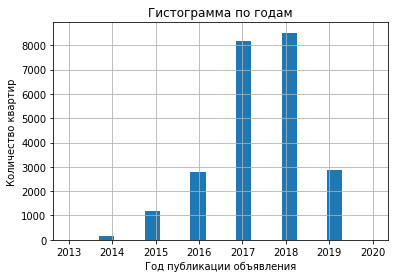

In [112]:
data['year'].hist(bins=20, range=(2013, 2020)) # гистограмма по годам

plt.title("Гистограмма по годам")
plt.ylabel("Количество квартир")
plt.xlabel("Год публикации объявления")
plt.show()

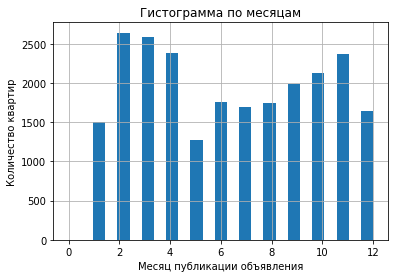

In [113]:
data['month'].hist(bins=25, range=(0, 12)) # гистограмма по месяцам за весь период

plt.title("Гистограмма по месяцам")
plt.ylabel("Количество квартир")
plt.xlabel("Месяц публикации объявления")
plt.show()

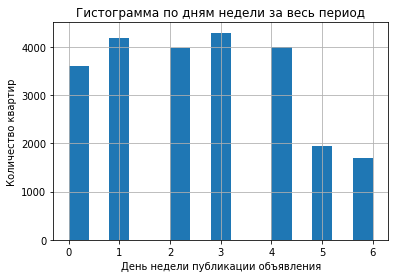

In [114]:
data['weekday'].hist(bins=15, range=(0, 6)) # гистограмма по дням недели за весь период

plt.title("Гистограмма по дням недели за весь период")
plt.ylabel("Количество квартир")
plt.xlabel("День недели публикации объявления")
plt.show()

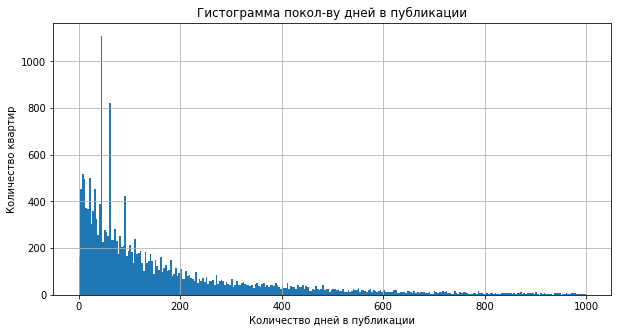

In [115]:
data['days_exposition'].hist(bins=300, range=(0, 1000), figsize=(10,5)) # гистограмма покол-ву дней в публикации

plt.title("Гистограмма покол-ву дней в публикации")
plt.ylabel("Количество квартир")
plt.xlabel("Количество дней в публикации")
plt.show()

In [116]:
# медианное значение кол-ва дней в публикации
print('Медианное значение кол-ва дней в публикации -', data['days_exposition'].median()) 

Медианное значение кол-ва дней в публикации - 95.0


In [117]:
# определим квартили, максимального, минимального и среднего значения
print(data['days_exposition'].describe())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


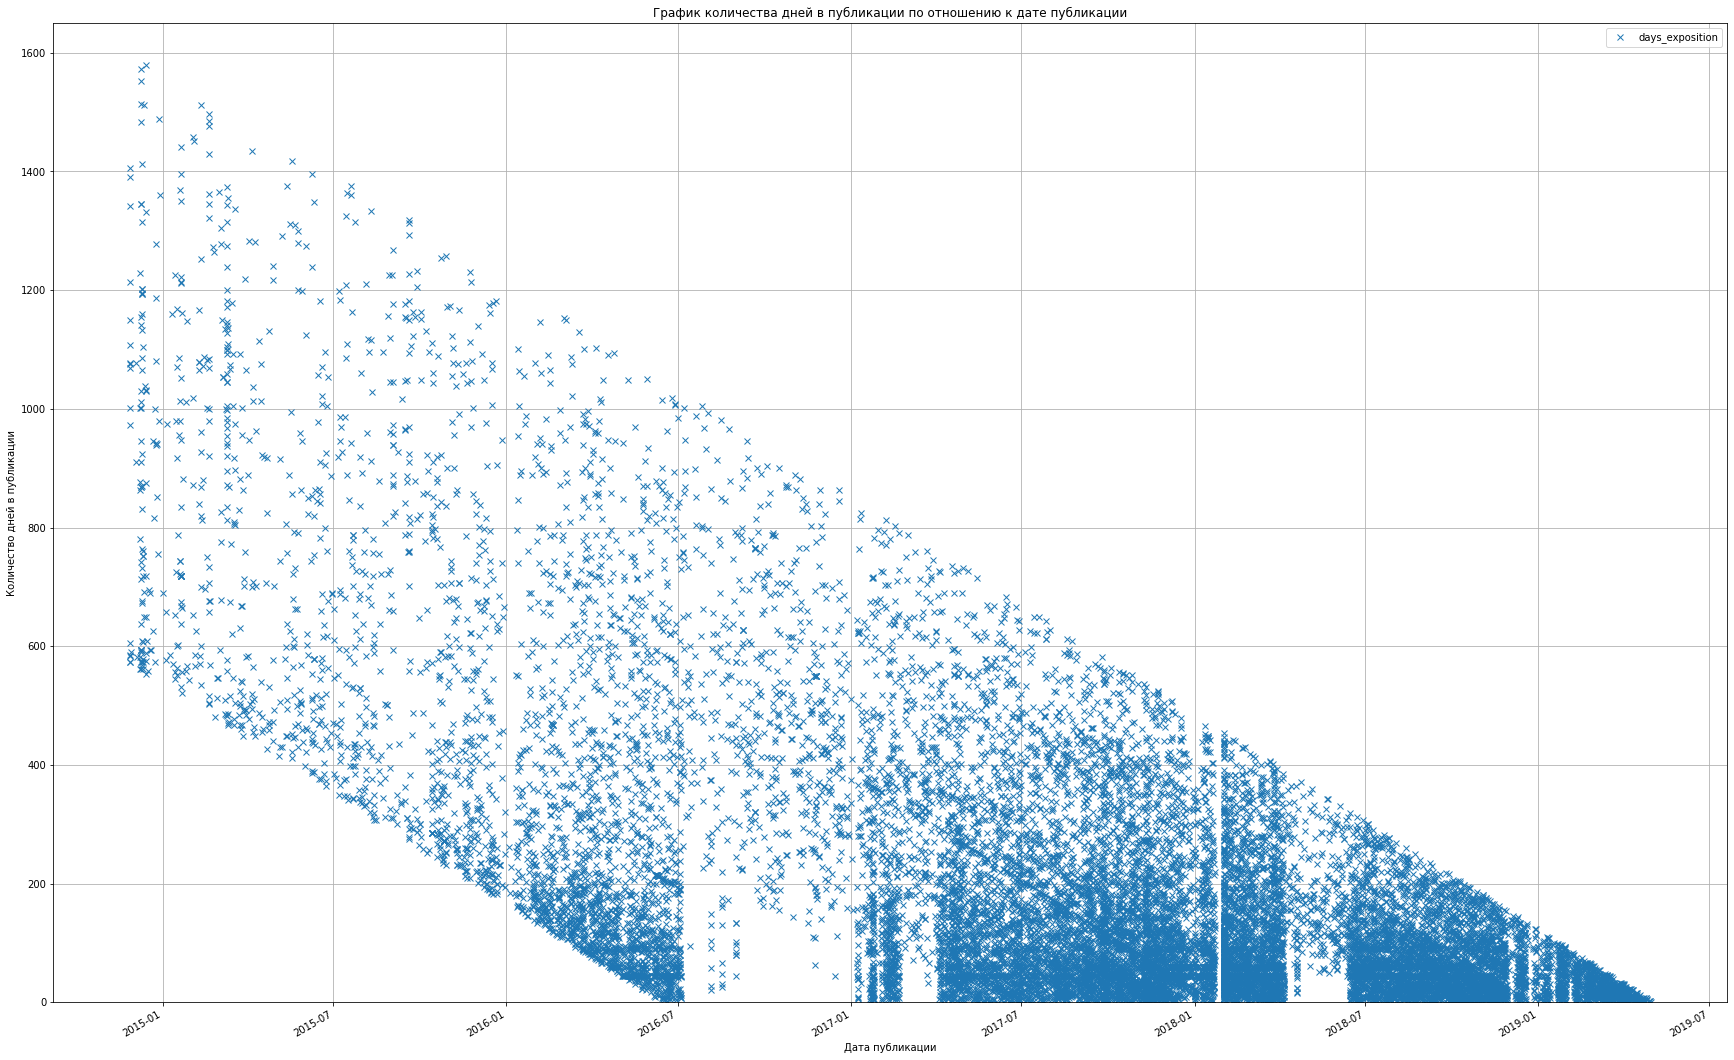

In [118]:
data.plot(x='first_day_exposition', y='days_exposition', style='x', ylim=(0, 1650), grid=True, figsize=(30, 20))
# график показывает, что в некоторые периоды вообще не было быстрых продаж,
# а в некоторые дни не было объявлений вообще, это странно

plt.title("График количества дней в публикации по отношению к дате публикации")
plt.ylabel("Количество дней в публикации")
plt.xlabel("Дата публикации")
plt.show()

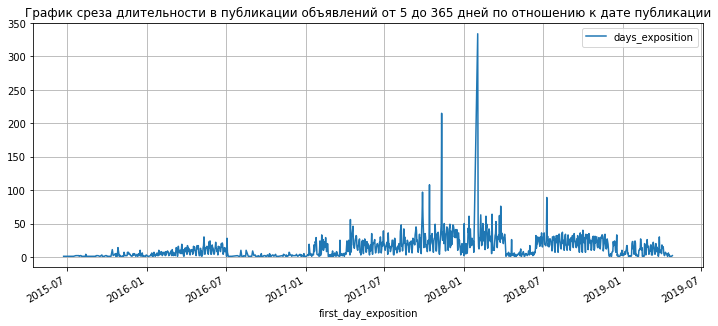

In [119]:
(data
    .query('days_exposition < 365 and days_exposition > 5')
    .pivot_table(aggfunc='count', index='first_day_exposition', values='days_exposition')
    .plot(grid=True, figsize=(12, 5))
)

plt.title("График среза длительности в публикации объявлений от 5 до 365 дней по отношению к дате публикации")
plt.show()

Матрица гистрограмм зависимостей между площадью квартиры, количеством комнат и удаленностью от центра


array([[<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>]],
      dtype=object)

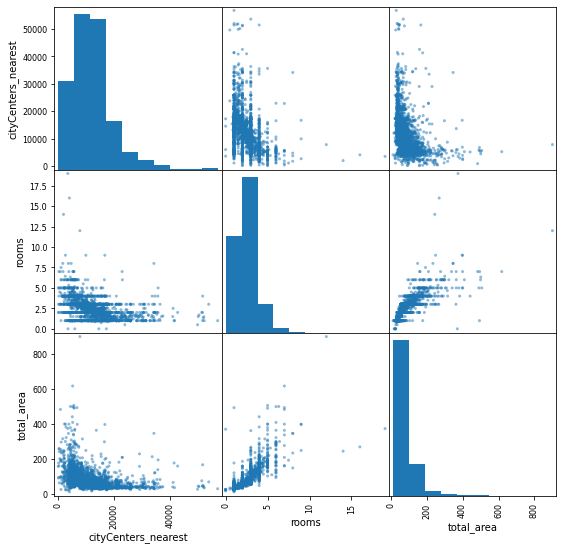

In [120]:
print('Матрица гистрограмм зависимостей между площадью квартиры, количеством комнат и удаленностью от центра')

data_price = data.pivot_table(index='last_price', values=['total_area', 'rooms', 'cityCenters_nearest'])
pd.plotting.scatter_matrix(data_price, figsize=(9, 9)) 

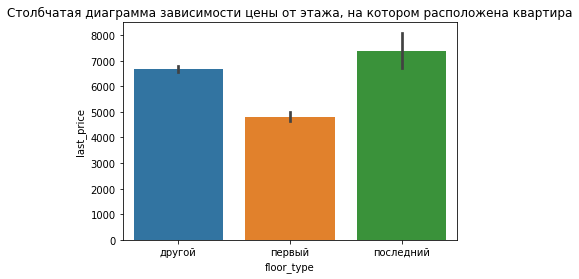

In [121]:
import seaborn
seaborn.barplot(x='floor_type', y='last_price', data=data)
# первый этаж дешевле чем любой другой, последние этажи выше всего в цене

plt.title("Столбчатая диаграмма зависимости цены от этажа, на котором расположена квартира")
plt.show()

<AxesSubplot:xlabel='year', ylabel='last_price'>

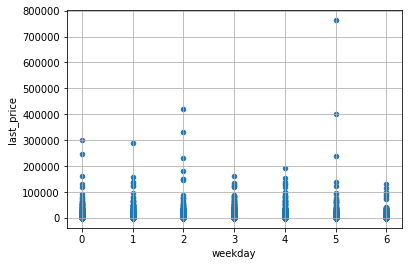

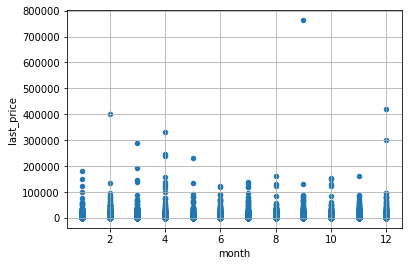

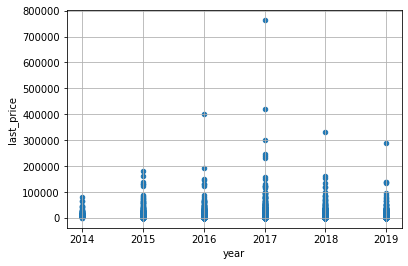

In [122]:
data.plot(x='weekday', y='last_price', kind='scatter', grid=True)
data.plot(x='month', y='last_price', kind='scatter', grid=True)
data.plot(x='year', y='last_price', kind='scatter', grid=True)

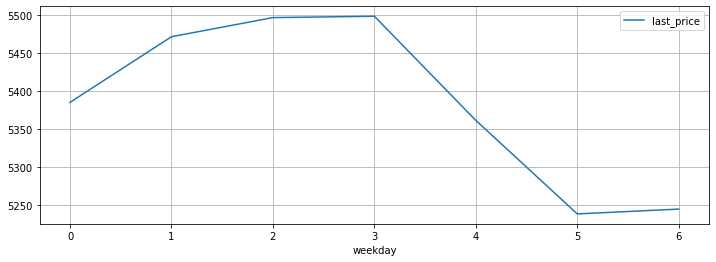

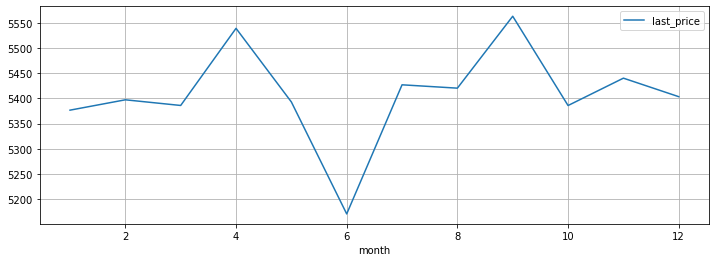

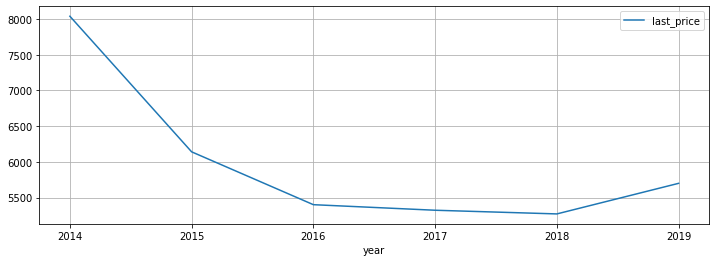

In [123]:
# графики выше показали выбивающиеся значения по ценам. Следует отсечь все значения выше 20 млн.руб

columns = ['weekday', 'month', 'year']

for i in columns:
    (data
        .query('last_price < 20000')
        .pivot_table(index=i, values='last_price')
        .plot(grid=True, figsize=(12, 4))
    )   

# графики ниже показывают зависимость средней цены от дня недели за весь период рассмотрения, от месяца за весь период и от года
# можно сказать, что в реднем в выходные дни цены ниже, в июне провал, а по годам падение цен к 2018 г и постепенный рост с 2019

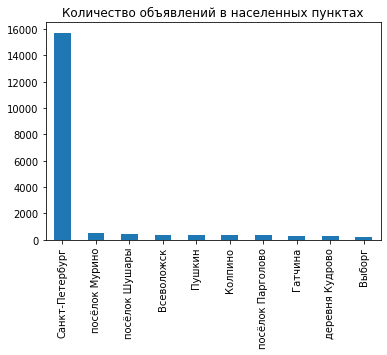

In [124]:
data['locality_name'].value_counts().head(10).plot(kind='bar')
plt.title("Количество объявлений в населенных пунктах")
plt.show()

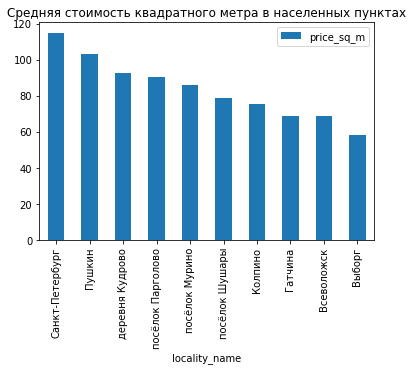

In [125]:
# средняя стоимость квадратного метра в населенных пунктах
locality_name_10 = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']
data_local = data.query('locality_name in @locality_name_10')
data_local_m = data_local.pivot_table(index='locality_name', values=['price_sq_m'])
data_local_m.sort_values(by='price_sq_m', ascending=False).plot(kind='bar')
plt.title("Средняя стоимость квадратного метра в населенных пунктах")
plt.show()

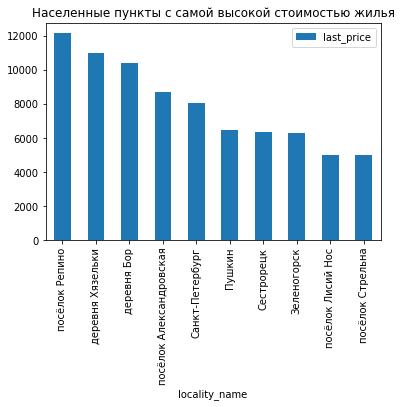

In [126]:
# населенные пункты с самой высокой стоимостью жилья
data_local_top = data.pivot_table(index='locality_name', values=['last_price'])
data_local_top.sort_values(by='last_price', ascending=False).head(10).plot(kind='bar')
plt.title("Населенные пункты с самой высокой стоимостью жилья")
plt.show()

Определим срез квартир, расположенных в центральной части города. Для этого выведем на экран график стоимости квартир в зависимости от удаленности. Стоимость квартир постепенно снижается по мере удаленности от самого центра города, однако в радиусе новостроек стоимость начинает резко возрастать. Найдем этот счкачек цен, тем самым условно определим радиус центральной части города.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

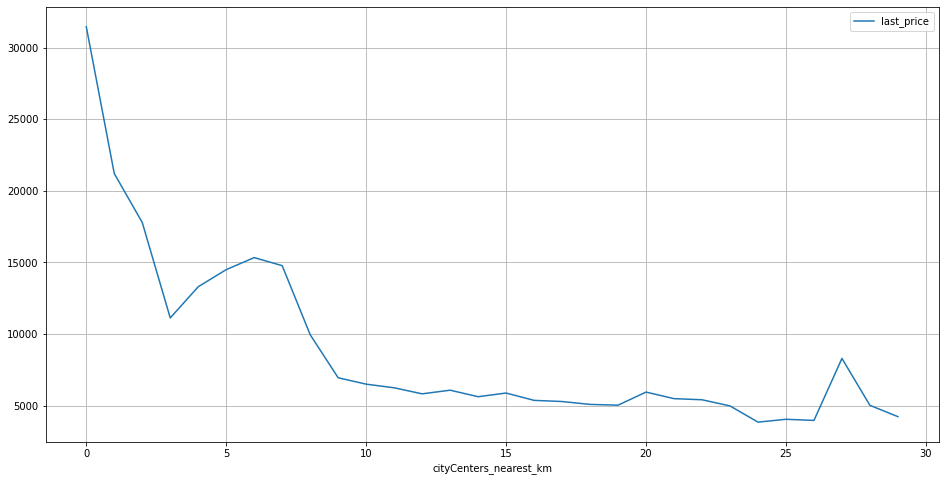

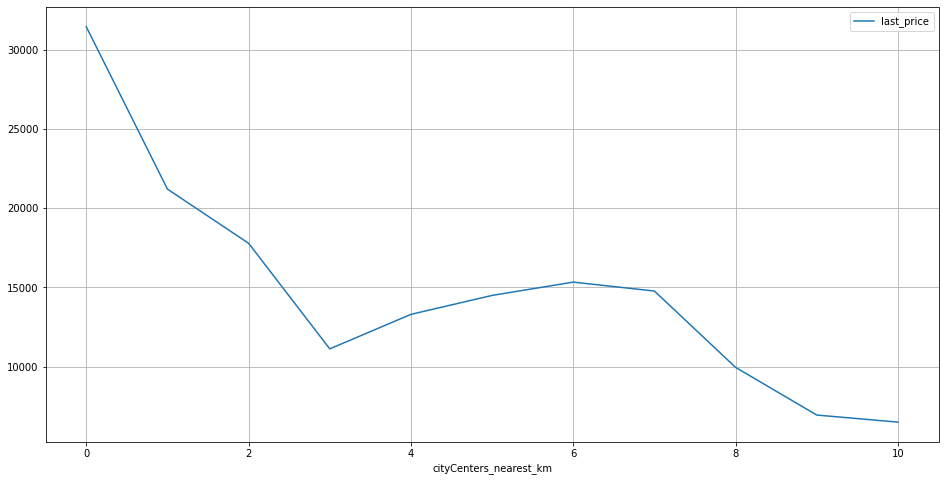

In [127]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000 # 
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round() # округляем до целых
(data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(grid=True, figsize=(16, 8))
)
(data
    .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 10')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(grid=True, figsize=(16, 8))
)

Как показывает график, квартиры в центре - это удаленность от центра 3-4 км

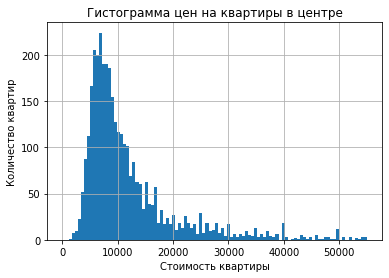

In [128]:
data_сenter = data.query('cityCenters_nearest_km < 8') 
data_сenter['last_price'].hist(bins=100, range=(0, 55000)) # гистограмма цен на квартиры в центре
plt.title("Гистограмма цен на квартиры в центре")
plt.ylabel("Количество квартир")
plt.xlabel("Стоимость квартиры")
plt.show()

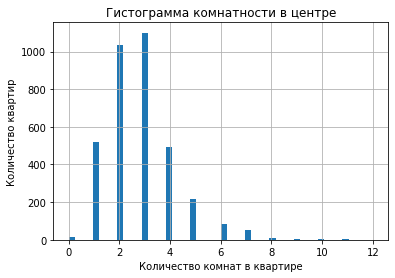

In [129]:
data_сenter['rooms'].hist(bins=50, range=(0, 12)) # гистограмма комнатности в центре
# в центре наиболее часто встречаются двукомнатные и трехкомнатные квартиры
plt.title("Гистограмма комнатности в центре")
plt.ylabel("Количество квартир")
plt.xlabel("Количество комнат в квартире")
plt.show()

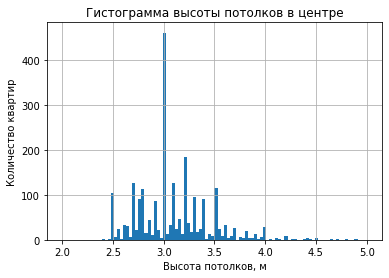

In [130]:
data_сenter['ceiling_height'].hist(bins=100, range=(2, 5)) # гистограмма высоты потолков в центре
# наиболее часто в центре высота потолков 3 м
plt.title("Гистограмма высоты потолков в центре")
plt.ylabel("Количество квартир")
plt.xlabel("Высота потолков, м")
plt.show()

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

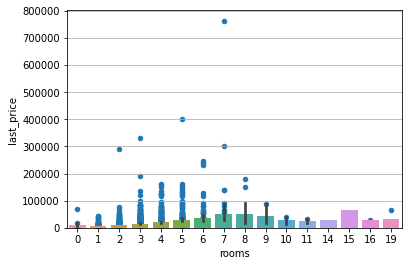

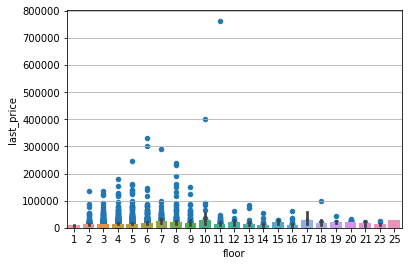

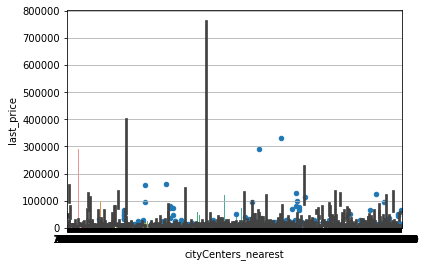

In [131]:
data_сenter.plot(x='rooms', y='last_price', kind='scatter', grid=True)
seaborn.barplot(x='rooms', y='last_price', data=data_сenter)
data_сenter.plot(x='floor', y='last_price', kind='scatter', grid=True)
seaborn.barplot(x='floor', y='last_price', data=data_сenter)
data_сenter.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)
seaborn.barplot(x='cityCenters_nearest', y='last_price', data=data_сenter)

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

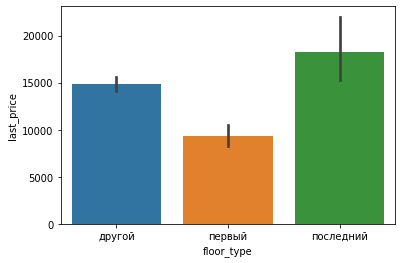

In [132]:
seaborn.barplot(x='floor_type', y='last_price', data=data_сenter)

# первый этаж дешевле чем любой другой, последние этажи выше всего в цене,
# однако первый этаж в центре сильно дешевле прочих, а разница последнего и других этажей небольшая

<AxesSubplot:xlabel='year', ylabel='last_price'>

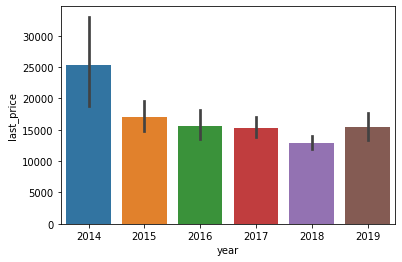

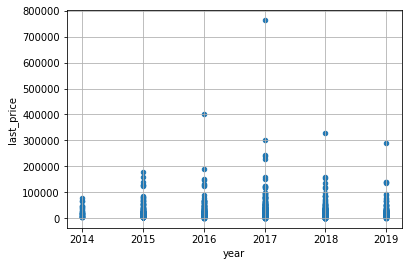

In [133]:
# анализ цен в центре по годам
seaborn.barplot(x='year', y='last_price', data=data_сenter)
data_сenter.plot(x='year', y='last_price', kind='scatter', grid=True)

In [134]:
city_pr = data['last_price'].mean()
center_pr = data_сenter['last_price'].mean()
city_sq_m = data['price_sq_m'].mean()
center_sq_m = data_сenter['price_sq_m'].mean()
city_count = data['last_price'].count()
center_count = data_сenter['last_price'].count()
city_height = data['ceiling_height'].mean()
center_height = data_сenter['ceiling_height'].mean()

center = pd.DataFrame({"local": ['city', 'center'],
                       "last_price": [city_pr, center_pr],
                       "price_sq_m": [city_sq_m, center_sq_m],
                       "count": [city_count, center_count],
                       "ceiling_height": [city_height, center_height]})

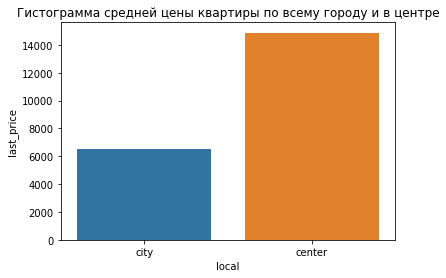

In [135]:
seaborn.barplot(x='local', y='last_price', data=center)
plt.title("Гистограмма средней цены квартиры по всему городу и в центре")
plt.show()

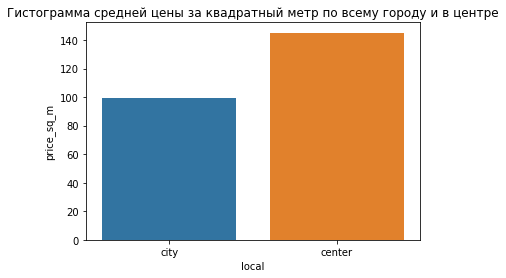

In [136]:
seaborn.barplot(x='local', y='price_sq_m', data=center)
plt.title("Гистограмма средней цены за квадратный метр по всему городу и в центре")
plt.show()

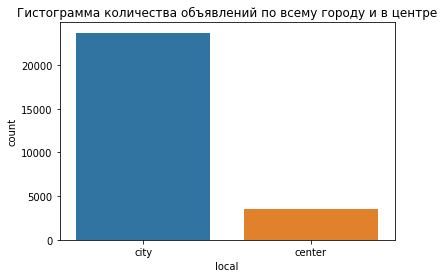

In [137]:
seaborn.barplot(x='local', y='count', data=center)
plt.title("Гистограмма количества объявлений по всему городу и в центре")
plt.show()

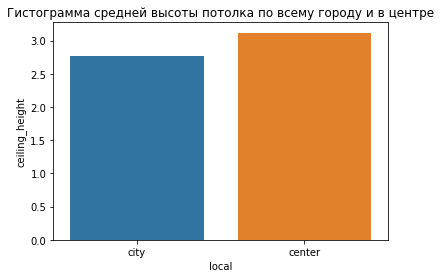

In [138]:
seaborn.barplot(x='local', y='ceiling_height', data=center)
plt.title("Гистограмма средней высоты потолка по всему городу и в центре")
plt.show()

## Общий вывод

Срдний срок продажи квартиры - пол года.
Быстрой продажей можно считать, если сделка состоялась в течение 1,5 месяца.
Сверх быстрая продажа - за 1 день.
Продажу можно считать долгой, если срок размещения объявления составляет более 8 месяцев.
Необычно долгим сроком продажи можно считать продажу через год и более, максимальный срок продажи составляет 4,4 года после первого опубликования.

Квартирой в центре можно считать квартиру, расположенную в радиусе 8-10 км от центра СПб.

Большинство квартир в центре имеют высоту потолков 3 м, тогда как в общем по региону этот параметр составляет 2,5м

Первый этаж дешевле чем любой другой, последние этажи выше всего в цене.
Однако, первый этаж в центре сильно дешевле прочих, а разница последнего и других этажей небольшая, в отличие от общих данных.

Количество однокомнатных и двукомнатных квартир преобладает, но в центре чаще встресаются трехкомнатные квартиры и двукомнатные почти также часто.